<font color = "Orange"> **Projeto - Relatório de fechamento de mercado por e-mail.**
> <font color = "Orange"> **Desafio**
<br>
<h5> >>>> <font color = "Yellow"> Passo 1 - Importar os módulos e bibliotecas.
<h5> >>>> <font color = "Yellow"> Passo 2 - Pegar dados do Ibovespa e do Dólar no Yahoo Finance.
<h5> >>>> <font color = "Yellow"> Passo 3 - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.
<h5> >>>> <font color = "Yellow"> Passo 4 - Calcular o retorno diário, mensal e anual.
<h5> >>>> <font color = "Yellow"> Passo 5 - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão pro texto  anexado no e-mail.
<h5> >>>> <font color = "Yellow"> Passo 6 - Fazer os gráficos dos ativos.
<h5> >>>> <font color = "Yellow"> Passo 7 - Enviar o e-mail.

><font color = "Orange"> Passo 1 - Importar os módulos e bibliotecas.

In [1]:
# Pacote para enviar e-mail
#!pip install pywin32

In [2]:
#!pip install yfinance==0.1.74

In [3]:
# Pacote gráfico
#!pip install mplcyberpunk

In [ ]:
import pandas as pd
import datetime
import yfinance as yf
import mplcyberpunk
import win32com.client as win32 # Módulo para enviar e-mail
import pytz # Módulo para configurar a timezone
import locale


from matplotlib import pyplot as plt # Pacote para plotar gráficos
from datetime import date

><font color = "Orange"> Passo 2: Pegar dados no Yahoo Finance

In [5]:
negotiation_codes = ["^BVSP", "BRL=X"]

today = datetime.datetime.now()
one_year_ago = today - datetime.timedelta(days=365) # Delta é a diferença entre dois tempos

market_data = yf.download(negotiation_codes, one_year_ago, today)

print(negotiation_codes)
print(today)
print(one_year_ago)

display(market_data)

[*********************100%***********************]  2 of 2 completed
['^BVSP', 'BRL=X']
2023-02-11 23:08:44.423914
2022-02-11 23:08:44.423914


Adj Close               Close                High            \
               BRL=X     ^BVSP     BRL=X     ^BVSP     BRL=X     ^BVSP   
Date                                                                     
2022-02-14  5.249956  113807.0  5.249956  113807.0  5.263300  114167.0   
2022-02-15  5.214000  114660.0  5.214000  114660.0  5.219900  114819.0   
2022-02-16  5.157900  115181.0  5.157900  115181.0  5.184725  115734.0   
2022-02-17  5.135800  113528.0  5.135800  113528.0  5.180000  115214.0   
2022-02-18  5.170600  112768.0  5.170600  112768.0  5.175100  114213.0   
...              ...       ...       ...       ...       ...       ...   
2023-02-06  5.149800  108456.0  5.149800  108456.0  5.206000  108710.0   
2023-02-07  5.145700  107920.0  5.145700  107920.0  5.205700  109037.0   
2023-02-08  5.209300  109882.0  5.209300  109882.0  5.240100  110175.0   
2023-02-09  5.199500  107783.0  5.199500  107783.0  5.274000  110046.0   
2023-02-10  5.289500  108150.0  5.289500  108150.0  5.304566  108647.0   

                 Low                Open           Volume              
               BRL=X     ^BVSP     BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                                   
2022-02-14  5.195300  113358.0  5.250500  113643.0      0  10757600.0  
2022-02-15  5.166288  113882.0  5.213700  113905.0      0  11649600.0  
2022-02-16  5.143800  114816.0  5.158000  114830.0      0  12052100.0  
2022-02-17  5.121471  113389.0  5.133567  115181.0      0  10807500.0  
2022-02-18  5.116900  112701.0  5.168756  113534.0      0  11300700.0  
...              ...       ...       ...       ...    ...         ...  
2023-02-06  5.147992  107416.0  5.149800  108518.0      0  11514600.0  
2023-02-07  5.133384  107234.0  5.145700  108727.0      0  12956300.0  
2023-02-08  5.164117  107830.0  5.209300  107832.0      0  13837000.0  
2023-02-09  5.170100  107781.0  5.199500  109952.0      0  12956000.0  
2023-02-10  5.225173  107620.0  5.289500  108002.0      0  14458000.0  

[260 rows x 12 columns]

><font color = "Orange"> Passo 3 - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.
>><font color = "Orange"> Passo 3.1 - Manipulando os dados - seleção e exclusão dos dados

In [6]:
#closing_data.columns #Acessando o atributo columns
closing_data = market_data['Adj Close']
closing_data.columns = ['Dólar', 'Ibovespa']

closing_data = closing_data.dropna() # removing NaN values

display(closing_data)

,Dólar,Ibovespa
Date,,
2022-02-14,5.249956,113807.0
2022-02-15,5.214000,114660.0
2022-02-16,5.157900,115181.0
2022-02-17,5.135800,113528.0
2022-02-18,5.170600,112768.0
...,...,...
2023-02-06,5.149800,108456.0
2023-02-07,5.145700,107920.0
2023-02-08,5.209300,109882.0


><font color = "Orange"> Passo 3 - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.
>><font color = "Orange"> Passo 3.2 - Manipulando os dados - criando tabelas com outros timeframes

In [7]:
# Turning the data into annual (.last)
annual_data = closing_data.resample("Y").last()
#display(annual_data)

# Turning the data into monthly
montly_data = closing_data.resample("M").last()
display(montly_data)

# Turning the data into monthly
daily_data = closing_data.resample("D").last().dropna()
display(daily_data)

,Dólar,Ibovespa
Date,,
2022-02-28,5.1222,113142.0
2022-03-31,4.7697,119999.0
2022-04-30,4.9378,107876.0
2022-05-31,4.7524,111351.0
2022-06-30,5.1809,98542.0
2022-07-31,5.1827,103165.0
2022-08-31,5.1219,109523.0
2022-09-30,5.3962,110037.0
2022-10-31,5.2885,116037.0


,Dólar,Ibovespa
Date,,
2022-02-14,5.249956,113807.0
2022-02-15,5.214000,114660.0
2022-02-16,5.157900,115181.0
2022-02-17,5.135800,113528.0
2022-02-18,5.170600,112768.0
...,...,...
2023-02-06,5.149800,108456.0
2023-02-07,5.145700,107920.0
2023-02-08,5.209300,109882.0


><font color = "Orange"> Passo 4 - Calcular o retorno diário, mensal e anual.

In [8]:
annual_return = annual_data.pct_change().dropna()
montly_return = montly_data.pct_change().dropna()
daily_return = daily_data.pct_change().dropna()

display(annual_return)
display(montly_return)
display(daily_return)

,Dólar,Ibovespa
Date,,
2023-12-31,0.00431,-0.017095


,Dólar,Ibovespa
Date,,
2022-03-31,-0.068818,0.060605
2022-04-30,0.035243,-0.101026
2022-05-31,-0.037547,0.032213
2022-06-30,0.090165,-0.115033
2022-07-31,0.000347,0.046914
2022-08-31,-0.011731,0.061629
2022-09-30,0.053554,0.004693
2022-10-31,-0.019959,0.054527
2022-11-30,-0.003839,-0.030602


,Dólar,Ibovespa
Date,,
2022-02-15,-0.006849,0.007495
2022-02-16,-0.010760,0.004544
2022-02-17,-0.004285,-0.014351
2022-02-18,0.006776,-0.006694
2022-02-21,-0.006402,-0.009249
...,...,...
2023-02-06,0.019924,-0.000313
2023-02-07,-0.000796,-0.004942
2023-02-08,0.012360,0.018180


><font color = "Orange"> Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão pro texto  anexado no e-mail.
>><font color = "Orange"> loc -> Referencia elementos a partir do nome
>><font color = "Orange"> iloc -> Seleciona elementos como uma matriz

In [9]:
loc_return_feb_03_23 = daily_return.loc["2023-02-03", "Dólar"] # location by name (loc)
iloc_return_feb_03_23 = daily_return.iloc[-5, 0] # array location

print(loc_return_feb_03_23)
print(iloc_return_feb_03_23)

# Daily finding the last element
daily_dolar_last_element = daily_return.iloc[-1, 0]
daily_ibovespa_last_element = daily_return.iloc[-1, 1]

print(daily_dolar_last_element, "Daily Dolar pct last element")
print(daily_ibovespa_last_element, "Daily Ibovespa pct last element")

# Montly finding the last element
montly_dolar_last_element = montly_return.iloc[-1, 0]
montly_ibovespa_last_element = montly_return.iloc[-1, 1]

print(montly_dolar_last_element, "Montly Dolar pct last element")
print(montly_ibovespa_last_element, "Montly Ibovespa pct last element")

# Year finding the last element
year_dolar_last_element = annual_return.iloc[-1, 0]
year_ibovespa_last_element = annual_return.iloc[-1, 1]

print(year_dolar_last_element, "Year Dolar pct last element")
print(year_ibovespa_last_element, "Year Montly Ibovespa pct last element")

-0.0008509186392321455
0.019923901731429217
0.017309385736172578 Daily Dolar pct last element
0.003404989655140467 Daily Ibovespa pct last element
0.03413558828730823 Montly Dolar pct last element
-0.04740513687770853 Montly Ibovespa pct last element
0.004310076340301006 Year Dolar pct last element
-0.017095182266815723 Year Montly Ibovespa pct last element


><font color = "Orange"> Tranformar em porcentagem, arredondar e definis a quantidade de casas decimais

In [10]:
daily_dolar_last_element = round((daily_dolar_last_element * 100), 2) # The last argument sets the number of decimal places
daily_ibovespa_last_element = round((daily_ibovespa_last_element * 100), 2)

montly_dolar_last_element = round((montly_dolar_last_element * 100), 2)
montly_ibovespa_last_element = round((montly_ibovespa_last_element * 100), 2)

year_dolar_last_element = round((year_dolar_last_element * 100), 2)
year_ibovespa_last_element = round((year_ibovespa_last_element * 100), 2)

<font color = "Orange"> Passo 6 - Fazer os gráficos dos ativos.

In [11]:
closing_data

,Dólar,Ibovespa
Date,,
2022-02-14,5.249956,113807.0
2022-02-15,5.214000,114660.0
2022-02-16,5.157900,115181.0
2022-02-17,5.135800,113528.0
2022-02-18,5.170600,112768.0
...,...,...
2023-02-06,5.149800,108456.0
2023-02-07,5.145700,107920.0
2023-02-08,5.209300,109882.0


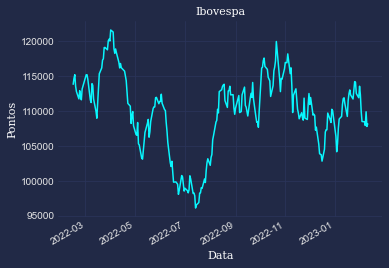

In [12]:
# Creating the Ibovespa chart
plt.style.use("cyberpunk")

font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 11,
        }

closing_data.plot(y = "Ibovespa", use_index = True, legend = False)

plt.title("Ibovespa", fontdict=font)
plt.xlabel('Data', fontdict=font)
plt.ylabel('Pontos', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

# Saving the image
plt.savefig('ibovespa.png', dpi = 300)

plt.show()

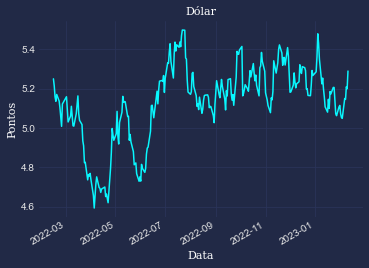

In [13]:
# Creating the Dólar chart
plt.style.use("cyberpunk")

font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 11,
        }

closing_data.plot(y = "Dólar", use_index = True, legend = False)

plt.title("Dólar", fontdict=font)
plt.xlabel('Data', fontdict=font)
plt.ylabel('Pontos', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

# Saving the image
plt.savefig('dolar.png', dpi = 300)

plt.show()

><font color = "Orange"> Passo 7 - Enviar o e-mail.

In [14]:
outlook = win32.Dispatch("outlook.application")

email = outlook.CreateItem(0)

In [15]:
#email

In [16]:
nome = "Bruno"

timezone = pytz.timezone('America/Sao_Paulo')
hoje = datetime.datetime.now().astimezone(timezone)

locale.setlocale(locale.LC_ALL, "pt_br") # Trabalhando na localidade português Brasil
data_em_texto = hoje.strftime("%d/%m/%Y - %A").upper()
mes = hoje.strftime("%B").upper()

email.To = "bruno_gaddini@hotmail.com"
email.Subject = "Relatório Diário"
email.Body = f'''{nome}, segue o relatório diário - {data_em_texto}:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {year_ibovespa_last_element}%,
enquanto em {mes.lower()} a rentabilidade é de {montly_ibovespa_last_element}%.

No último dia útil, o fechamento do Ibovespa foi de {daily_ibovespa_last_element}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {year_dolar_last_element}%,
enquanto em {mes.lower()} a rentabilidade é de {montly_dolar_last_element}%.

No último dia útil, o fechamento do Dólar foi de {daily_dolar_last_element}%.

'''

anexo_ibovespa = r'C:\Users\Bruno\Desktop\Python\Finance Bootcamp\Aula 01\ibovespa.png'
anexo_dolar = r'C:\Users\Bruno\Desktop\Python\Finance Bootcamp\Aula 01\dolar.png'

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)

email.Send()